In [632]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# for numeric calculations
import numpy as np

import seaborn as sns


In [633]:
dataset = '../data/cleaned_Medicaldataset.csv.csv'
df = pd.read_csv(dataset, header=0)

#### Prepare The Data For Training

In [634]:
# Convert the dataset into array
array = df.values

In [635]:
# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1]

In [636]:
# Separate input data into classes based on labels of heart attack
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])

## Step 4: Training
Time to try to train a model.
1. Split the dataset into two: __training set__ and __test set__
2. Build the classifier by implementing __Decision Tree__ algorithm over the training set
3. Test the classifier over the test set
3. Estimate how accurate it is

In [637]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.2

In [638]:
#  Initialize seed parameter for the random number generator used for the split
seed = 7

In [639]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [640]:
# Build Decision Trees Classifier 
params = {'max_depth': 3}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [641]:
# draw tree from the trained data by graphviz package
import graphviz
dot_data = tree.export_graphviz(
    classifier,
    out_file=None,
    feature_names=df.columns[:-1],  # Use DataFrame columns except the last one (label)
    class_names=['No HA', 'HA'],  # Replace with your actual class names if different
    filled=True,
    rounded=True,
    proportion=False,
    special_characters=True
)

In [642]:
# result DT saved in file heart.pdf
graph = graphviz.Source(dot_data)

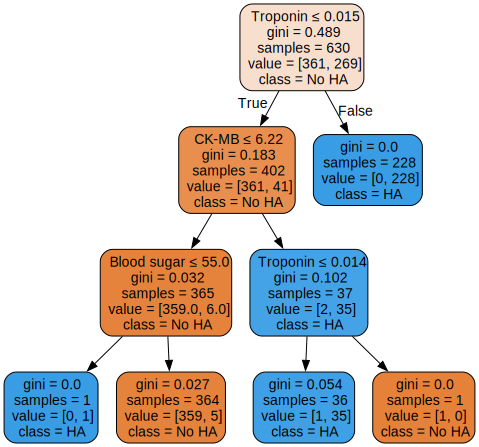

In [643]:
graph

## Step 5. Model Validation

We need a metrics for the evaluation
‘accuracy‘ is the percentage % of correctly predicted instances from the total number of instances in the dataset.

In [644]:
# Set the metrics
scoring = 'accuracy'

Now we can try to implement the model on our test set.

In [645]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array(['negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negati

In [646]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.9683544303797469


In [647]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[85,  0],
       [ 5, 68]])

In [648]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,negative,positive
row_0,,
negative,85,0
positive,5,68


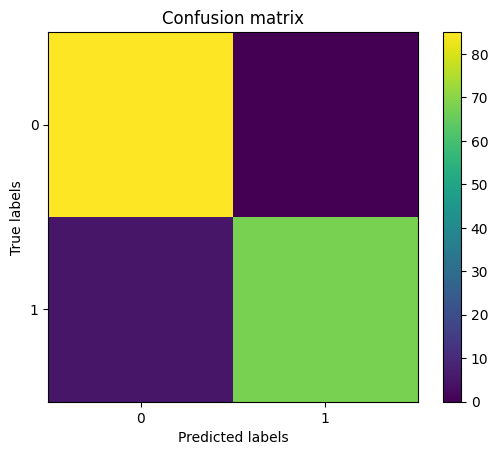

In [649]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

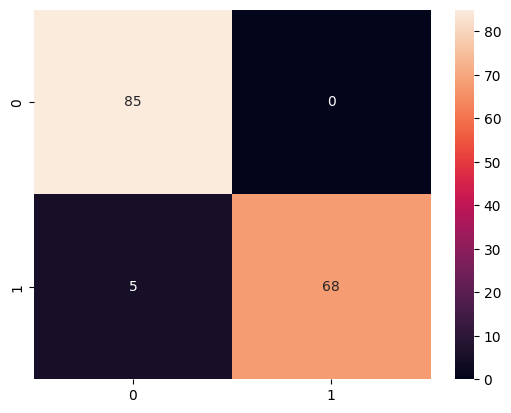

In [650]:
sns.heatmap(confusion_mat, annot=True)

In [651]:
# The diagonal elements (TN, TP) represent the number of points for which the predicted label is equal to the true label, 
# while off-diagonal elements are those that are mislabeled by the classifier. 
# The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
# FN - False Negative prediction
# FP - False Positive prediction

In [652]:
# Confusion matrix provides an indication of the  errors made in predictions, here in text format
# print(confusion_matrix(y_test, y_testp))

In [653]:
class_names = ['No HA', 'HA']
# Classifier performance on training dataset
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names, digits=3))
plt.show()

              precision    recall  f1-score   support

       No HA      0.986     0.997     0.992       361
          HA      0.996     0.981     0.989       269

    accuracy                          0.990       630
   macro avg      0.991     0.989     0.990       630
weighted avg      0.991     0.990     0.990       630



In [654]:
# Classifier performance on test dataset
print(classification_report(y_test, classifier.predict(X_test), target_names=class_names, digits=3))
plt.show()

              precision    recall  f1-score   support

       No HA      0.944     1.000     0.971        85
          HA      1.000     0.932     0.965        73

    accuracy                          0.968       158
   macro avg      0.972     0.966     0.968       158
weighted avg      0.970     0.968     0.968       158



In [655]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=1, random_state=7)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=7)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Classification Report
print("\n=== Decision Tree Report ===")
print(classification_report(y_test, dt_preds, digits=4))

print("=== Random Forest Report ===")
print(classification_report(y_test, rf_preds, digits=4))


=== Decision Tree Report ===
              precision    recall  f1-score   support

    negative     0.8586    1.0000    0.9239        85
    positive     1.0000    0.8082    0.8939        73

    accuracy                         0.9114       158
   macro avg     0.9293    0.9041    0.9089       158
weighted avg     0.9239    0.9114    0.9101       158

=== Random Forest Report ===
              precision    recall  f1-score   support

    negative     0.9444    1.0000    0.9714        85
    positive     1.0000    0.9315    0.9645        73

    accuracy                         0.9684       158
   macro avg     0.9722    0.9658    0.9680       158
weighted avg     0.9701    0.9684    0.9682       158



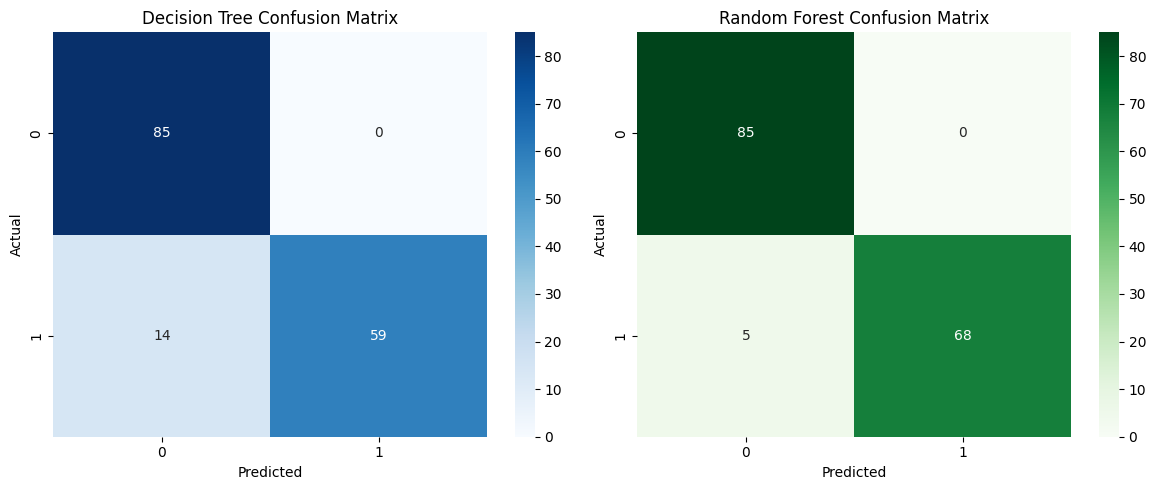

In [656]:
# Confusion Matrices
dt_cm = confusion_matrix(y_test, dt_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Decision Tree Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()